# Linear Regression

# Simple Linear Regression

Running a SLR in Python is fairly simple once you know how to use the relevant functions. What might be confusing is that there exist several packages which provide functions for linear regression. We will use functions from the `statsmodels` (sub-)package. Other packages such as e.g. `scikit-learn` have linear regression functions too, but what makes `statsmodels` stand out from other packages is its broad set of auxiliary functions for regression diagnostics. As usual we start by importing the packages needed for our task.

In [1]:
# Load relevant packages
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 14

As toy data we will use the 'Advertising' data set introduced in the chapter 4 of the script. The data is taken from James et al. (2013). A copy is provided on the book's website where we will download it from.

In [2]:
# From Advertising data set read cols 2:4
url = 'https://www.statlearning.com/s/Advertising.csv'
ad = pd.read_csv(url, sep=',', usecols=(np.arange(1, 5, 1)))
print(ad.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


Next we run a linear regression of `TV` on `sales` to calculate the coefficients and print a summary output.

In [3]:
# Run regression and calculate fit
reg = sm.OLS(ad.sales, exog=sm.add_constant(ad.TV)).fit()
# Alternatively: reg = sm.OLS(ad.sales, sm.add_constant(ad.TV)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        19:40:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Side note:** If you are an `R` guy and prefer their syntax, you could import the statsmodels.formula.api subpackage and run something like:

> `from statsmodels.formula.api import ols
reg = ols("Sales ~ TV", data=ad).fit()
reg.summary()`

Intercept will automatically be calculated in the above setting.

Both p-values for intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) are smaller than any reasonable significance level and thus we can reject the null hypothesis that either of the coefficients is zero (or irrelevant).

Instead of printing the whole summary, we could also access each of the three summary as follows:

In [4]:
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## Plotting the Fit

The `sm.OLS()` function calculates all kind of regression-related results. All this information is attached to the `reg` object. For example to plot the data we would need the model's fitted values. These can be accessed by combining the regression variable/object with the attribute `.fittedvalues` as in `reg.fittedvalues`. In below plot it is shown how this can be of use. We plot the data and fit using the standard plotting functions.

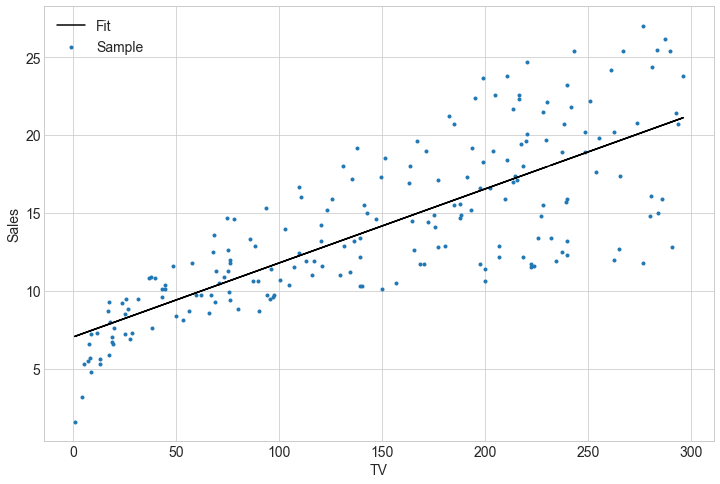

In [5]:
# Plot scatter & lm
plt.figure(figsize=(12, 8))
plt.scatter(ad.TV, ad.sales, marker='.', label='Sample') # Training data
plt.plot(ad.TV, reg.fittedvalues, c='k', label='Fit')  # Linear fit
plt.ylabel('Sales')
plt.xlabel('TV')
plt.legend();

Let us plot residuals versus fitted values to do some visual regression diagnostics:

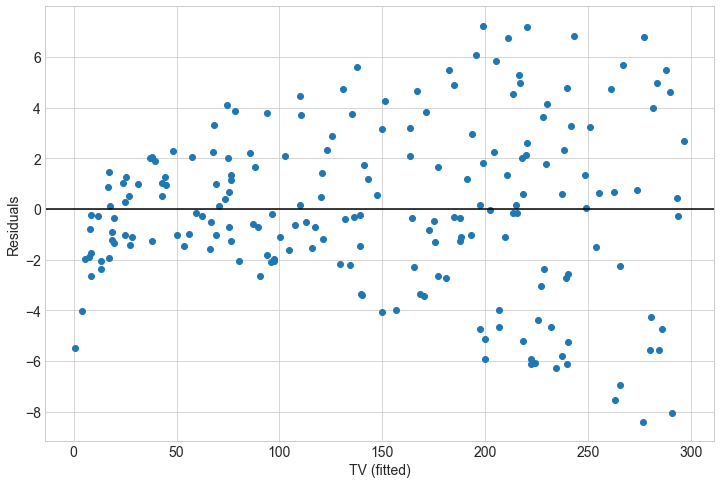

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(ad.TV, reg.resid)
plt.axhline(y=0, c='k')  #Black horizontal line at 0
plt.xlabel('TV (fitted)')
plt.ylabel('Residuals');

The above two plots are just standard `matplotlib` plots serving the purpose of visual diagnostics. Beyond that, the `statsmodel` package has separate built-in plotting functions suited for visual regression diagnostics. We will not discuss them here but if interested you'll find plenty of sources on the web (e.g. [here](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html), [here](http://www.statsmodels.org/stable/graphics.html) or [here](http://mpastell.com/2013/04/19/python_regression/))

## Accessing the Output

The `reg` object contains a ton of information which you can all access. To see what there is, type `reg.` and press tab. Two examples are shown below. Notice that some are attributes (like `x.shape`, `x.size`) and do not need paranthesis to call them. Others are methods (similar to `.sum()`, `.min()`) and require parenthesis.

In [7]:
# Regression coefficients
print(reg.params, '\n')
print(reg.resid.head())

const    7.032594
TV       0.047537
dtype: float64 

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
dtype: float64


# Confidence Intervals & Hypthesis Testing

The 95%-confidence interval (CI) is printed in the summary above. If one wishes to calculate it for a different significance level (`alpha`), it is done as follows:

In [8]:
# 99% CI (alpha = 1%) based on t-distribution
reg.conf_int(alpha=0.01)

,0,1
const,5.841796,8.223391
TV,0.040539,0.054535


The regression summary provides $t$-statistic and p-value for the null hypothesis $H_0: \hat{\beta}_j = 0$, $H_a: \hat{\beta}_j \neq 0$. You can call the resulting $t$-statistic and p-value with its attributes.

In [9]:
print(reg.tvalues, '\n')
print(reg.pvalues)

const    15.360275
TV       17.667626
dtype: float64 

const    1.406300e-35
TV       1.467390e-42
dtype: float64


If you wish to test a different null hypothesis, e.g. $H_0: \hat{\beta}_{TV} = 0.054$ vs. $H_1: \hat{\beta}_{TV} \neq 0.054$ use the following code:

In [10]:
reg.t_test('TV=0.054')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0475      0.003     -2.402      0.017       0.042       0.053

As far as I know, `Statsmodels` does not provide a function to calculate 'greater than' or 'smaller than' alternative hypothesis. Reason being: because with symmetric distributions, the one-sided test can be derived from the two-sided test. A one-sided p-value is just half of the two-sided p-value. This means that given p and $t$ values from a two-tailed test, you would reject the null hypothesis of a greater-than test when p/2 < alpha and $t$ > 0, and of a less-than test when p/2 < alpha and $t$ < 0.

## Coefficient of Determination

The $R^2$ measure, or "coefficient of determination", displays the proportion of the variability in $y$ that is well explained by the regression fit. It is defined as 

$$\begin{equation}
R^2 = \frac{TSS - SSR}{TSS} = 1 - \frac{SSR}{TSS}
\end{equation}$$

where TSS is the *total sum of squares*, defined as $TSS = \sum (y_i - \bar{y})^2$, and SSR is the *sum of squared residuals*, given by $SSR = \sum (y_i - \hat{y}_i)^2$.

It is easy to call the $R^2$ value from the regression object `reg` as the following line shows.

In [11]:
# R squared measure
reg.rsquared

0.611875050850071

## Regression Diagnostics
### Test of Homoskedasticity

In general we assume a constant variance of the error term (homoskedasticity; $Var(\epsilon_i) = \sigma^2$ for $i = 1, \ldots, N$). From the residuals vs. fitted plot we have to question this assumption. To test it mathematically, you can run a heteroskedasticity test. The stats package offers several test options; the more common ones are White's or the one from Breusch-Pagan. See [here for more details](http://www.statsmodels.org/dev/diagnostic.html) on tests on heteroskedasticity.

Below the White test is applied as an example. The parameter 'reg.model.exog' simply contains the matrix X (here it is a [200 x 2] matrix with constant 1 in first column and values for TV in second). The output should become more clear when you check the function's help page (use `?sm.stats.diagnostic.het_white`). 

The null hypothesis is that the error variance does **not** depend on X, thus is homoskedastic. Based on the large f-statistic value we can gently reject the null-hypothesis that the error variance is homoskedastic.

In [12]:
# Test for heteroskedasticity with White test
wht = sm.stats.diagnostic.het_white(resid=reg.resid, exog=reg.model.exog)
print('f-statistic: {0:>19.4f} \n'
      'p-value for f-statistic: {1:>7.4f}'.format(wht[2], wht[3]))

f-statistic:             35.1683 
p-value for f-statistic:  0.0000


If you wish to run tests with heteroskedastistic robust standard errors you can either access the `reg` object's robust standard errors (`reg.HC0_se`, `reg.HC1_se`, `reg.HC2_se`, `reg.HC3_se`) or, more conveniently, directly define the covariance estimator (e.g. 'HC3' as below) when you generate the object in the first place. Below example shows how you can do this. See also [here](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) or [here](https://stackoverflow.com/questions/30553838/getting-statsmodels-to-use-heteroskedasticity-corrected-standard-errors-in-coeff) for some further information.

In [13]:
regRobust = sm.OLS(ad.sales, exog=sm.add_constant(ad.TV)).fit(cov_type='HC3')
print(regRobust.HC3_se, '\n')
print(reg.HC3_se)

const    0.336426
TV       0.002890
dtype: float64 

const    0.336426
TV       0.002890
dtype: float64


C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Other Relevant Checks

The `statsmodels` package offers many more functions to run regression diagnostics, e.g. checks for autocorrelation, non-linearity, normality of residuals etc. These functions are applicable to both simple as well as multiple linear regression models. There's a short [Jupyther notebook](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html) detailing some of the options. 

## Application: Stock Beta

A stock beta measures the systematic risk of a security, the tendency of a security to respond to swings in the broad market. Typically, a large, well diversified index is taken as a proxy for the market portfolio (e.g. S&P500, Euro Stoxx 50, SPI, etc.). There are different ways to calculate a stock beta. We will show the regression approach, where a stock's beta is the slope of the following linear regression:

$$\begin{equation}
r - r_f = \alpha + \beta(r_M - r_f) + e
\end{equation}$$

Let us look into Geberit's stock beta. As a proxy for the market portfolio we use the Swiss market index (SMI). The risk free rate is set to $r_f=0$, which is a fairly reasonable approach in light of [the Swiss national bank's (SNB) interest rates](https://data.snb.ch/de/topics/ziredev#!/cube/zimoma) for the past eight years (at the time of this writing in 2021). We will work with monthly returns for the past five years (60 months) - though other approaches (e.g. last 24 monthly returns, weekly returns for last 2 years, etc.) are reasonable choices too. The stock and SMI data we will load from a csv that was sourced through a financial data provider.

In [14]:
df = pd.read_csv('Data/SMIDataMonthly.csv', sep=',',
                 parse_dates=['Date'], dayfirst=True,
                 index_col=['Date'])
df.head()

,ABBN,ADEN,BAER,CFR,CSGN,GEBN,GIVN,LHN,LONN,NESN,...,ROG,SCMN,SGSN,SLHN,SREN,UBSG,UHR,ZURN,SIK,SMI
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,25.95,76.60,63.9,89.32,17.96,441.0,2240.0,57.00,258.9,80.42,...,229.45,508.4,2503,349.5,91.80,18.90,426.5,305.9,8065,9335.40
2017-12-29,26.12,74.55,59.6,88.30,17.40,429.1,2252.0,54.95,263.3,83.80,...,246.50,518.5,2541,345.0,91.25,17.94,397.4,296.6,7740,9381.87
2017-11-30,25.19,74.40,57.8,84.70,16.66,427.8,2238.0,53.80,257.1,84.25,...,248.20,519.0,2432,330.2,92.20,16.99,358.7,297.2,7600,9318.77
2017-10-31,26.08,79.15,59.0,92.00,15.73,451.6,2228.0,56.35,265.0,83.90,...,230.50,504.0,2464,346.8,93.85,16.98,391.0,304.5,7385,9242.18
2017-09-29,23.94,75.40,57.3,88.50,15.33,458.1,2107.0,56.60,254.0,81.10,...,247.20,496.2,2323,341.1,87.70,16.55,402.8,295.4,7205,9157.46


The dataframe `df` contains monthly closing prices on all SMI-stocks (incl. SMI index) with a date index in descending order. Let us create a separate Pandas dataframe with the returns of the past 60 months (`dfRets`) for both GEBN as well as the index.

In [15]:
# Calculate returns and assign to variable dfRets
dfRets = pd.DataFrame()
dfRets['GEBNrets'] = np.log(df['GEBN'] / df['GEBN'].shift(-1))
dfRets['SMIrets'] = np.log(df['SMI'] / df['SMI'].shift(-1))
print(dfRets.head())

            GEBNrets   SMIrets
Date                          
2018-01-31  0.027355 -0.004965
2017-12-29  0.003034  0.006748
2017-11-30 -0.054141  0.008253
2017-10-31 -0.014291  0.009209
2017-09-29  0.044640  0.025662


Having done that, we are already set to run the regression and print the results. 

In [16]:
# Set observation period (last 60 monthly returns)
months = 60

# Create OLS object, run regression and calculate fit
regBeta = sm.OLS(endog=dfRets.iloc[:months, 0], 
                 exog=sm.add_constant(dfRets.iloc[:months, 1])).fit()

# Show table on coefficients
print(regBeta.summary())

                            OLS Regression Results                            
Dep. Variable:               GEBNrets   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     26.23
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.62e-06
Time:                        19:40:27   Log-Likelihood:                 107.89
No. Observations:                  60   AIC:                            -211.8
Df Residuals:                      58   BIC:                            -207.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.005      1.617      0.1

C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Based on the regression output we have no reason to reject the null of Geberit's stock beta being equal to zero. The $R^2$ measure, though, shows that only a small portion of the variation in Geberits monthly returns is explained by SMI's monthly returns.

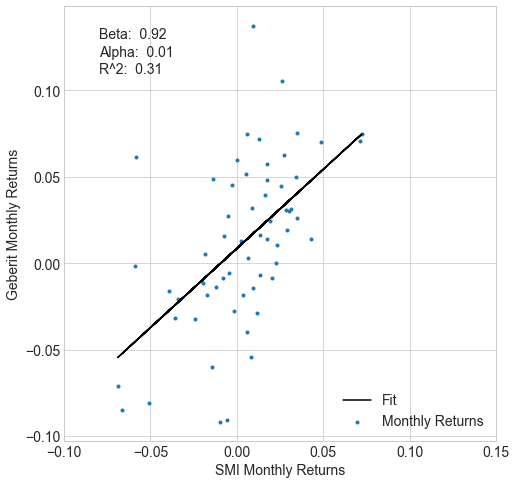

In [17]:
# Get relevant information
beta = regBeta.params['SMIrets']
alpha = regBeta.params["const"]
rsqr = regBeta.rsquared

# Plot scatter & lm; add text with alpha, beta , R2
plt.figure(figsize=(12, 8))
plt.scatter(dfRets.iloc[:months, 1], 
            dfRets.iloc[:months, 0], 
            marker='.', label='Monthly Returns')
plt.plot(dfRets.iloc[:months, 1], regBeta.fittedvalues, c='k', label='Fit')
plt.gca().set_aspect('equal')
plt.gca().set_xlim(-0.1, 0.15)
plt.ylabel('Geberit Monthly Returns')
plt.xlabel('SMI Monthly Returns')
plt.legend(loc='lower right')
plt.text(-0.08, 0.13, 'Beta: {0: .2f}'.format(beta))
plt.text(-0.08, 0.12, 'Alpha: {0: .2f}'.format(alpha))
plt.text(-0.08, 0.11, 'R^2: {0: .2f}'.format(rsqr));

What we calculated above is often referred to as the raw beta. The beta value of a stock has been found to be on average closer to the mean value of 1.0, the beta of an average-systematic-risk portfolio, than to the value of the raw beta (Pinto et al. (2016)). This is why data providers such as Bloomberg publish the adjusted beta as first introduced by Blume (1971), which is calculated as 

$$ \text{Adjusted beta} = 2/3 \cdot \text{raw beta} + 1/3 \cdot 1$$

Now, let us assume we are given the task to investigate whether a beta indeed regresses to 1 over time. For that we could, as a starting point, assess a stock's rolling beta over the past years. Note that this is just an example of use. Computationally it would be much faster to calculate the stock beta via the covariance/variance formula.

In [18]:
def rollingBeta(df, window=60):
    
    '''Calculates the running beta of a stock.
    
    Parameters
    ==========
    df : [n x 2] pandas dataframe with log-returns for
         stock and market portfolio. Index should be
         datetime series.
    window : rolling window with default value 60 [optional]
        
    Returns
    =======
    rb : Pandas dataframe with (backward-looking) rolling beta. 
    '''
    
    # Drop NA rows from df
    df = df.dropna()
    # Set up empty results array
    res = np.empty(len(df) - window + 1)
    
    # Loop through df
    for i in range(0, len(df)):
        
        # As long as remaining subset is >= window, we proceed
        if (len(df) - i) >= window:
            
            # Subset df
            sub = df.iloc[i:window+i, :]
            # Run Regression
            model = sm.OLS(endog=sub.iloc[:, 0],
                           exog=sm.add_constant(sub.iloc[:, 1])).fit()
            # Read out beta coefficient
            res[i] = model.params[1]
    
    # Format output to dataframe
    rb = pd.DataFrame(data=res, index=df.index[:(len(df)-window+1)])
    rb.columns = ['RollingBeta']
    
    return rb

Now we are ready to call the function. This time we use the last two years of monthly returns. Thus we set `window=24` to overwrite the default value of 60.

In [19]:
# Call function and save output to 'rollBeta'
rollBeta = rollingBeta(df=dfRets, window=24)

C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Though this is far away from a thorough analysis, plotting the results shows that at least in Geberit's case, there is indeed some truth to the assessment, that the beta exhibits some reversion to the market beta value of 1.

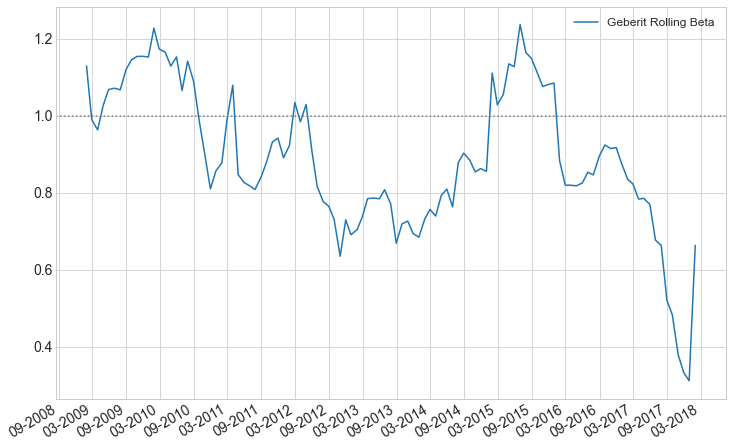

In [20]:
# Import 'mdates' library to format dates in x-axis
import matplotlib.dates as mdates

# Plot rolling beta
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(rollBeta, label='Geberit Rolling Beta')
ax.axhline(y=1, c='gray', linestyle=':')  # Horizontal line
ax.legend(fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
fig.autofmt_xdate();  # Autorotate x-axis for readability

# Multiple Linear Regression

## Estimating the Regression Coefficients

Simple linear regression serves well to introduce the concept and to build a good understanding. However, in reality we often have to work with more than one predictor. In the advertising data set for example we had not only data on TV advertising spendings but also on radio newspaper. It thus makes sense to extend the simple to a multiple linear regression model.

We again use the Advertising data set to see how this is done in Python. The same functions from the `statsmodels` package apply to multiple linear regression. We run the following regression

$$\text{sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \beta_3 \text{newspaper} + \epsilon$$

In [21]:
# Assign features and response to X and y
y = ad.sales
X = ad[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)

In [22]:
# Run regression and print summary
mlReg = sm.OLS(endog=y, exog=X).fit()
print(mlReg.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        19:40:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

The coefficient for radio (0.1885) tells us, that - holding all other factors fixed - an additional 1'000 dollars in radio advertising spendings will boost the product's sales by 188.5 units.

Again: If you are an `R` guy and prefer their syntax, you could import the statsmodels.formula.api subpackage and run something like:

> `from statsmodels.formula.api import ols
mlReg = ols("Sales ~ TV + radio + newspaper", data=ad).fit()
mlReg.summary()`

## Hypothesis Tests

Again the summary above provides $t$-statistic and p-value for each individual regression coefficient. As was the case for the simple linear regression, the underlying null hypothesis is that each parameter is zero ($H_0: \beta_{j,\, H_0} = 0$). For TV and Radio we reject the null even at the 1% significance level. However, given the large p-value for Newspaper we fail to reject the null for $\beta_{\text{Newspaper}} = 0$ at any reasonable level. Thus we can conclude that leaving Newspaper data out might be a reasonable option. If other null hypothesis' ought to be tested, we can use the same command as shown above.

In [23]:
# t-test on H0: beta(TV) = 0.0475
mlReg.t_test('TV=0.0475')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0458      0.001     -1.244      0.215       0.043       0.049

The output shows that we fail to reject the null hypothesis that $\beta_{TV} = 0.0475$.


Beyond the element-wise hypothesis tests the regression summary also provides **F-statistic** (and the corresponding p-value) on the combined hypothesis that 

$$\begin{align}
H_0&: \quad \beta_j = \beta_1, \beta_2, \ldots \beta_p = 0 \\
H_a&: \quad \beta_j \neq 0 \text{ for at least one $j$}
\end{align}$$

On the basis of the corresponding p-value (i.e. 1.58e-96) we can reject the null at any reasonable significance level. Should we be interested in assessing a particular hypothesis, say 

$$\begin{align}
H_0&: \quad \beta_{TV} = \beta_{\text{Radio}} = 0.1 \\
H_a&: \quad \beta_{TV} \neq \beta_{\text{Radio}} \neq 0.1
\end{align}$$
we use the `.f_test()` method. 


In [24]:
# Test H0: beta(radio) = beta(newspaper) = 0.1
mlReg.f_test('radio = newspaper = 0.1')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[158.25546736]]), p=1.23080057155986e-41, df_denom=196, df_num=2>

See the [documentation page](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.f_test.html) for further examples on how this function can be used.

### Coefficient of Determination

The $R^2$ measure for the MLR is the same as for the SLR. However, in the case of MLR it has one drawback: the value will always increase when more explanatory variables are added to the model - even if those variables are only weakly associated with the response. To make good on this disadvantage a modificated measure is often used: **adjusted $R^2$**.

$$\begin{equation}
R^2_{adj} = 1 - (1-R^2) \frac{n-1}{n-p-1}
\end{equation}$$

To get this measure in Python, simply use the OLS object and call the `.rsquareed_adj` attribute.

In [25]:
mlReg.rsquared_adj

0.8956373316204668

## Application: Factor Models



### Fama-French Three Factor Model

We will apply the concept of multiple linear regression in the context of Fama-French's three factor model (Fama and French (1993)). Their model follows Ross' arbitrage pricinge theory which postulates that excess returns are linearly related to a set of systematic risk factors (Ross et al. (1973)). The factors can be returns on other assets, such as the market portfolio, or any other variable (e.g. interest rates, inflation, consumption growth, market sentiment, hedging demands etc.. Fama-French empirically discovered three factors to capture the systematic risk: (A) firm size, (B) book-to-market ratio (B/M) and (C) market risk. To quantify their findings, Fama-French constructed zero-net-investment factor portfolios capturing the systematic risk on firm size (factor is labeled 'small minus big' (SMB) and is constructed by going long on small and short on big size stocks) and B/M (labeled 'high minus low' (HML), i.e. going long on high B/M, short on low B/M stocks). The sensitivity of individual stocks to the three factors is then given by the estimated coefficients of a multiple linear regression. As a group the three factors combine for the total risk premium. 

The expected excess return $R_{it}$ of asset $i$ at time $t$ in the Fama-French three-factor model is described by

$$\begin{equation}
R_{it} = \alpha_i + \beta_i^{M} (r_{M,t} - r_{f,t}) + \beta_i^{SMB} SMB_t + \beta_i^{HML} HML_t + \epsilon_{it}
\end{equation}$$

The above Fama-French factors are calculated on a monthly basis and published on [Kenneth R. French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). There you will also find information on the methodology of the model and lots of other possible factors besides the three we look into here. To run this regression in Python we use a shortcut. The `pandas_datareader` package is capable of loading the data without having to download a txt or csv file in a separate step. 

We will calculate the factor beta for all 20 SMI stocks. For that we use Fama-French's 'European 3 Factors' data. Following our 'Stock Beta' example from above and for the sake of simplicity, the risk free rate for Switzerland is again assumed to be zero (wrt. $R_{it}$).

### Prepare Data for Fama-French Model
We start by importing the `pandas_datareader.data` package and defining some key parameter.

In [26]:
import pandas_datareader as web

# Define obs. period, start & enddate
months = 60
startdate = '2012-06-01'
enddate   = '2017-12-31'

**Side Note:** If you want to know what data is available (and their labels), you can run the `get_available_datasets()` function.

> `from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()`

or simply check [Kenneth R. French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [27]:
# Load FF factors 
data = web.DataReader('Europe_3_Factors', data_source='famafrench',
                      start=startdate, end=enddate)

Variable `data` is a dictionary with three entries: monhtly data, annual data and a description. We select the monthly rates in dictionary 0 and format the data.

In [28]:
# Select monthly data
ff = data[0]

# Sort data in descending order
ff = ff.sort_index(ascending=False)

# Convert returns to decimal percentages
ff = ff/100
print(ff.head(3))

         Mkt-RF     SMB     HML      RF
Date                                   
2017-12  0.0147  0.0155  0.0050  0.0009
2017-11 -0.0001 -0.0038  0.0129  0.0008
2017-10  0.0059 -0.0096 -0.0013  0.0009


Next we calculate the log-returns of all SMI stocks. The share prices are taken from dataframe `df` which we loaded above. 

In [29]:
shsRets = np.log(df / df.shift(-1))
shsRets = shsRets['2012-06-01':'2017-12-31']
shsRets = shsRets.iloc[:, :-1]  # We exclude the last column (with SMI data)
shsRets.head(3)

C:\Users\BENZIM~1\AppData\Local\Temp/ipykernel_8780/504962713.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  shsRets = shsRets['2012-06-01':'2017-12-31']


,ABBN,ADEN,BAER,CFR,CSGN,GEBN,GIVN,LHN,LONN,NESN,NOVN,ROG,SCMN,SGSN,SLHN,SREN,UBSG,UHR,ZURN,SIK
Date,,,,,,,,,,,,,,,,,,,,
2017-12-29,0.036254,0.002014,0.030667,0.041625,0.043460,0.003034,0.006236,0.021150,0.023829,-0.005356,-0.021609,-0.006873,-0.000964,0.043844,0.043846,-0.010357,0.054408,0.102457,-0.002021,0.018253
2017-11-30,-0.034722,-0.061889,-0.020549,-0.082673,0.057441,-0.054141,0.004478,-0.046309,-0.030265,0.004163,0.024040,0.073984,0.029328,-0.013072,-0.049050,-0.017738,0.000589,-0.086221,-0.024266,0.028697
2017-10-31,0.085618,0.048538,0.029237,0.038786,0.025758,-0.014291,0.055839,-0.004427,0.042396,0.033943,-0.008480,-0.069947,0.015597,0.058927,0.016573,0.067776,0.025650,-0.029733,0.030341,0.024676


### Calculate Fama-French Coefficients


In order to run the regression we need to have matching indices. Fama-French's index is 'yyyy-mm' while our dataframe with returns has format 'yyyy-mm-dd'. Since we know that the length of both dataframes is equal, we can simply overwrite the index of one of the dataframes.

In [30]:
# Create matching indices
ff.index = shsRets.index

We are now in a position to run the multiple linear regression. We will again use the past 60 months. From the Fama French set we just need the first three columns. Column 4 is the risk free rate which we do not use.

In [31]:
# Add constant to matrix for alphas (=intercept)
X = sm.add_constant(ff.iloc[:months, :3])

C:\Users\Ben Zimmermann\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
# Assign ticker to variable
tickers = shsRets.columns

In [33]:
# Create results matrix to paste beta factors
res = np.empty(shape=(5, len(tickers)))

In [34]:
# Run regression for each ticker
for i in range(0, len(tickers)):
    
    # Select returns of share i
    sub = shsRets.iloc[:months, i]
    # Run regression
    model = sm.OLS(endog=sub, exog=X).fit()
    # Paste beta factors to 'res' matrix
    res[0:4, i] = model.params
    res[4, i] = model.rsquared_adj

In [35]:
# Format output to dataframe
ff3f = pd.DataFrame(data=res, index=['Alpha', 'BetaMkt', 'BetaSMB', 'BetaHML', 'R2_adj'])
ff3f.columns = tickers

And here are our factors:

In [36]:
ff3f

,ABBN,ADEN,BAER,CFR,CSGN,GEBN,GIVN,LHN,LONN,NESN,NOVN,ROG,SCMN,SGSN,SLHN,SREN,UBSG,UHR,ZURN,SIK
Alpha,-0.000906,-0.001914,0.005105,-0.002015,-0.011465,0.011036,0.013076,-0.011962,0.022730,0.003479,0.003800,0.002710,0.005065,0.000988,0.010169,0.005657,-0.002030,-0.009120,0.002555,0.018161
BetaMkt,0.693293,0.845470,0.625330,0.912283,0.937398,0.464959,0.501213,1.176732,0.803426,0.509535,0.503625,0.448914,0.345137,0.519122,0.481308,0.260073,0.731883,0.926187,0.416506,0.660433
BetaSMB,0.279470,0.693865,0.041670,-0.395494,0.345019,-0.517202,-0.700818,0.099676,0.078710,-0.423302,-0.418416,-0.324102,-0.809450,-0.296927,0.898115,-0.570457,0.007746,-0.141485,-0.645586,-0.413393
BetaHML,0.140517,0.423802,0.674928,0.284910,1.700849,-0.157164,-0.524454,0.331936,-0.206294,-0.576125,-0.359140,-0.289612,-0.207932,-0.411242,0.542230,-0.284763,1.046295,0.297058,0.039949,0.006759
R2_adj,0.187997,0.336439,0.178910,0.294399,0.356713,0.103455,0.223414,0.432733,0.213924,0.312858,0.164864,0.107853,0.165120,0.100622,0.155472,0.042623,0.295308,0.216747,0.099964,0.169966


In [37]:
# Transpose matrix (.T) and display stats summary
print(ff3f.T.describe())

           Alpha    BetaMkt    BetaSMB    BetaHML     R2_adj
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.003256   0.638141  -0.160618   0.123625   0.207969
std     0.008962   0.235797   0.461006   0.566272   0.101621
min    -0.011962   0.260073  -0.809450  -0.576125   0.042623
25%    -0.001940   0.477221  -0.446777  -0.285975   0.143567
50%     0.003095   0.572226  -0.310515   0.023354   0.183454
75%     0.006785   0.813937   0.083951   0.354903   0.294626
max     0.022730   1.176732   0.898115   1.700849   0.432733


### Hedge a Portolio

Now that we have all the factors, let's assume we want to build a portfolio with all 20 SMI stocks that maximizes the Sharpe ratio (SR). As a further condition we want to limit our exposure to the SMB factor to, let's say, $\beta_p^{SMB} = 0$. How would we allocate our investment under these conditions? In mathematical terms we have the following optimization problem:

$$\begin{equation}
\max_{w_i} SR = \frac{\mathbb{E}[r_p] - r_f}{\sigma_p} \qquad s.t. \qquad 
\begin{cases}
\sum w_i &= 1 \\
\beta_p^{SMB} &= 0
\end{cases}
\end{equation}$$

Usually, to calculate the expected return $\mathbb{E}[r_p]$, historical returns are taken. For our case here, we will take the expected returns given by our Fama-French 3 Factor model (denoted $\mathbf{R_{ff}}$). The portfolio variance $\sigma_p$ however, we estimate using historical data. Alternatively one could think of taking the SMI volatility index value as proxy. But this is only approximately true because we will not have the same weights per stock as the SMI and this thus might be questionable. With that we have

$$\begin{equation}
\max_{w_i} SR = \frac{\mathbf{w}^T \left(r_f + \mathbf{\alpha} + \mathbf{\beta}^{M} (r_{M} - r_{f}) + \mathbf{\beta}^{SMB} SMB + \mathbf{\beta}^{HML} HML \right) - r_f}{\mathbf{w}^T \mathbf{\Sigma}\mathbf{w}} \qquad s.t. \qquad 
\begin{cases}
\sum w_i &= 1 \\
\beta_p^{SMB} &= 0
\end{cases}
\end{equation}$$



Python can solve this problem numerically. We first set the stage by defining a auxiliary function `pfStats` that returns the expected portfolio return, volatility and Sharpe ratio given a vector of weights. Note that the function also makes use of other data like monthly returns and the riskfree rate as previously defined (which is set to 0) but only weights are a function input value. This is necessary for the optimization function.

In [38]:
# Define rf and (equally spread) start weights
rf = 0
wghts = np.repeat(1. / len(tickers), len(tickers))

# Expected stock returns based on ff3f model
expShsRets = rf + ff3f.T.Alpha + \
    ff3f.T.BetaMkt * ff['Mkt-RF'].mean() + \
    ff3f.T.BetaSMB * ff.SMB.mean() + \
    ff3f.T.BetaHML * ff.HML.mean()

In [39]:
def pfStats(weights):
    '''Returns basic measures for a portfolio
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    expPfRet : float
        weighted, annualized expected portfolio return based on ff3f model
    pfVol : float
        historical annualized portfolio volatility
    SR : float
        portfolio Sharpe ratio for given riskfree rate
    '''
    
    expPfRet = np.sum(weights * expShsRets) * 12
    pfVol    = np.sqrt(np.dot(weights.T, np.dot(shsRets.cov() * 12, weights)))
    SR       = (expPfRet - rf) / pfVol 
    
    return np.array([expPfRet, pfVol, SR])

Python's scipy package has a sublibrary for constrained optimization problems. We will use the minimize function and minimize the negative value of the Sharpe ratio (which is obviously equal to maximizing the SR)

In [40]:
import scipy.optimize as sco

def minSR(wghts):
    return -pfStats(wghts)[2]

Our constraints are as stated above: $\sum w_i = 1$, $\beta_P^{SMB} = 0$. Additionally we set bounds for the weights such that short/long position are allowed but only up to 100% per share ($w_i \in [-1, 1]\; \forall i \in [1, 2, \ldots, n]$).

In [41]:
# Constraints and bounds
constr = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
          {'type': 'eq', 'fun': lambda x: np.sum(x * ff3f.T.BetaSMB) - 0}]
bnds   = tuple((-1,1) for x in range(len(tickers)))

In [42]:
# Minimization function
optPf = sco.minimize(minSR, x0=wghts, method='SLSQP', bounds=bnds, constraints=constr)

In [43]:
# Check if conditions are actually met
print('Sum of weights:  ', np.sum(optPf['x']))
print('Beta SMB factor: ', np.sum(optPf['x'] * ff3f.T.BetaSMB))

Sum of weights:   1.0
Beta SMB factor:  -2.963684853085624e-12


In [44]:
# Calculate portfolio stats given optimal weights
rsltsOptPf = pfStats(optPf['x'])

# Format weights into dataframe with Tickers as heading
optWghts = pd.DataFrame(data=optPf['x'], index=tickers)
optWghts.columns = ['optimalWghts']

# Print results
print('Portfolio return:     ', str(rsltsOptPf[0]))
print('Portfolio volatility: ', str(rsltsOptPf[1]))
print('Portfolio SR:         ', str(rsltsOptPf[2]), '\n')
print(str(optWghts))

Portfolio return:      0.6625784189236861
Portfolio volatility:  0.2005679622860137
Portfolio SR:          3.303510747039633 

      optimalWghts
ABBN     -0.054099
ADEN     -0.257005
BAER      0.099358
CFR       0.263547
CSGN     -0.191775
GEBN      0.078464
GIVN      0.606703
LHN      -0.465790
LONN      0.525159
NESN      0.233943
NOVN      0.392504
ROG      -0.679709
SCMN     -0.118646
SGSN     -0.266730
SLHN      0.739888
SREN     -0.049775
UBSG      0.078083
UHR      -0.280615
ZURN     -0.466523
SIK       0.813018


# Further Ressources


In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources were consulted and are recommended as further reading on the discussed topics:

* Blume, Marshall E., 1971, On the Assessment of Risk, *The Journal of Finance* 26, 1-10.
* Fama, Eugene F, and Kenneth R French, 1993, Common risk factors in the returns on stocks and bonds, *Journal of Financial Economics* 33, 3–56.
* Hilpisch, Yves, 2019, Python for Finance (O'Reilly Media, Sebastopol, CA).
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, 2013, *An Introduction to Statistical Learning: With Applications in R* (Springer Science & Business Media, New York, NY).
* Müller, Andreas C., and Sarah Guido, 2017, *Introduction to Machine Learning with Python* (O’Reilly Media, Sebastopol, CA).
* Pinto, Jerald E., Elaine Henry, Thomas R. Robinson, and John D. Stowe, 2016, *Equity Asset Valuation* (MIT Press, Cambridge, MA).
* Ross, Stephen A., et al., 1973, Return, risk and arbitrage (Rodney L. White Center for Financial Research, The Wharton School, University of Pennyslvania).
*   Sheppard, Kevin, 2017, Introduction to Python for Econometrics, Statistics and Data Analysis from Website https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf, 07/07/2017.
* Wooldridge, Jeffrey M, 2015, *Introductory Econometrics: A modern approach* (Cengage Learning, Boston, MA).

